# 🧠 06 - AI Decision Layer
## E-commerce Customer Intelligence System

**INI INTI AI-NYA!**

**Tujuan Notebook:**
- Menggabungkan hasil clustering dan prediksi
- AI logic: interpretasi hasil
- Rekomendasi otomatis berbasis data
- Narasi insight untuk pengambilan keputusan

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.insert(0, os.path.abspath('../src'))
from models import load_model, get_cluster_summary
from ai_logic import (
    interpret_cluster, generate_cluster_profiles, generate_segment_strategy,
    generate_recommendation, generate_executive_summary, predict_customer_action
)

plt.style.use('seaborn-v0_8-whitegrid')

print('✅ AI Decision Engine loaded successfully!')

✅ AI Decision Engine loaded successfully!


---
## 1. Load Models & Data

In [2]:
# Load trained models
kmeans_model = load_model('../outputs/models/kmeans_model.pkl')
classifier_model = load_model('../outputs/models/best_classifier.pkl')
scaler = load_model('../outputs/models/clustering_scaler.pkl')
label_encoder = load_model('../outputs/models/label_encoder.pkl')

# Load data
df = pd.read_csv('../data/processed/customer_features.csv')
print(f"\n✅ Data loaded: {len(df)} customers")

✅ Model loaded from: ../outputs/models/kmeans_model.pkl
✅ Model loaded from: ../outputs/models/best_classifier.pkl
✅ Model loaded from: ../outputs/models/clustering_scaler.pkl
✅ Model loaded from: ../outputs/models/label_encoder.pkl

✅ Data loaded: 350 customers


In [3]:
# Assign clusters to all customers
clustering_features = ['Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
X_cluster = df[clustering_features].copy()
X_cluster_scaled = scaler.transform(X_cluster)

df['Cluster'] = kmeans_model.predict(X_cluster_scaled)

print("📊 Cluster Distribution:")
print(df['Cluster'].value_counts().sort_index())

📊 Cluster Distribution:
Cluster
0     59
1    174
2    117
Name: count, dtype: int64


---
## 2. AI-Powered Customer Segmentation Analysis

In [4]:
# Generate cluster summary
cluster_summary = get_cluster_summary(df, df['Cluster'].values)
print("📊 Cluster Statistics:")
display(cluster_summary)

📊 Cluster Statistics:


,Customer_Count,Avg_Spend,Avg_Items,Avg_Rating,Avg_Recency
Cluster,,,,,
0,59,1455.55,19.95,4.81,11.29
1,174,545.72,9.54,3.53,36.24
2,117,983.34,13.44,4.35,19.95


In [5]:
# AI-Generated Segment Profiles
profiles = generate_cluster_profiles(cluster_summary)

print("\n" + "═" * 70)
print("🧠 AI-GENERATED CUSTOMER SEGMENT ANALYSIS")
print("═" * 70)

for profile in profiles:
    print(f"\n┌{'─' * 68}┐")
    print(f"│ 🎯 SEGMENT {profile['cluster_id']}: {profile['persona']:^48} │")
    print(f"├{'─' * 68}┤")
    print(f"│ Customer Count: {profile['size']:>51} │")
    print(f"│ Business Priority: {profile['priority']:>48} │")
    print(f"│ Characteristics:                                                     │")
    for char in profile['characteristics']:
        print(f"│   • {char:<61} │")
    print(f"└{'─' * 68}┘")


══════════════════════════════════════════════════════════════════════
🧠 AI-GENERATED CUSTOMER SEGMENT ANALYSIS
══════════════════════════════════════════════════════════════════════

┌────────────────────────────────────────────────────────────────────┐
│ 🎯 SEGMENT 0:                  VIP Champions                   │
├────────────────────────────────────────────────────────────────────┤
│ Customer Count:                                                  59 │
│ Business Priority:                                       High Value │
│ Characteristics:                                                     │
│   • High Spender                                                  │
│   • Highly Active                                                 │
│   • Very Satisfied                                                │
└────────────────────────────────────────────────────────────────────┘

┌────────────────────────────────────────────────────────────────────┐
│ 🎯 SEGMENT 1:                 Budget

---
## 3. AI-Generated Business Strategies

In [6]:
# Generate segment strategies
strategies = generate_segment_strategy(profiles)

print("\n" + "═" * 70)
print("📋 AI-RECOMMENDED BUSINESS STRATEGIES")
print("═" * 70)

for strategy in strategies:
    print(f"\n🎯 {strategy['segment'].upper()}")
    print(f"   Cluster ID: {strategy['cluster_id']} | Customers: {strategy['customer_count']}")
    print(f"\n   📢 MARKETING STRATEGY:")
    print(f"      {strategy['marketing_strategy']}")
    print(f"\n   🔒 RETENTION STRATEGY:")
    print(f"      {strategy['retention_strategy']}")
    print(f"\n   💰 UPSELL OPPORTUNITY:")
    print(f"      {strategy['upsell_opportunity']}")
    print(f"\n   📊 RESOURCE ALLOCATION:")
    print(f"      {strategy['resource_allocation']}")
    print("\n" + "─" * 70)


══════════════════════════════════════════════════════════════════════
📋 AI-RECOMMENDED BUSINESS STRATEGIES
══════════════════════════════════════════════════════════════════════

🎯 VIP CHAMPIONS
   Cluster ID: 0 | Customers: 59

   📢 MARKETING STRATEGY:
      Exclusive VIP experiences and early access

   🔒 RETENTION STRATEGY:
      Dedicated account manager, loyalty rewards

   💰 UPSELL OPPORTUNITY:
      Premium services, bundled packages

   📊 RESOURCE ALLOCATION:
      High - Personalized attention

──────────────────────────────────────────────────────────────────────

🎯 BUDGET CONSCIOUS
   Cluster ID: 1 | Customers: 174

   📢 MARKETING STRATEGY:
      Value-focused promotions, discount alerts

   🔒 RETENTION STRATEGY:
      Consistent value delivery, bundle deals

   💰 UPSELL OPPORTUNITY:
      Cross-sell affordable add-ons

   📊 RESOURCE ALLOCATION:
      Low-Medium - Efficient mass communication

──────────────────────────────────────────────────────────────────────

🎯 REGULA

---
## 4. Individual Customer Recommendations

In [7]:
# Sample customer recommendations
print("\n" + "═" * 70)
print("🎯 AI-POWERED INDIVIDUAL CUSTOMER RECOMMENDATIONS")
print("═" * 70)

# Get sample customers from each risk level
sample_customers = [
    df[df['Risk_Level'] == 'High'].iloc[0],
    df[df['Risk_Level'] == 'Medium'].iloc[0],
    df[df['Risk_Level'] == 'Low'].iloc[0]
]

for customer in sample_customers:
    customer_data = customer.to_dict()
    recommendation = generate_recommendation(customer_data)
    
    print(f"\n┌{'─' * 68}┐")
    print(f"│ 👤 Customer ID: {recommendation['customer_id']} {' ' * 49}│")
    print(f"├{'─' * 68}┤")
    print(f"│ Risk Level: {recommendation['risk_level']:>55} │")
    print(f"│ Priority: {recommendation['priority']:>57} │")
    print(f"├{'─' * 68}┤")
    print(f"│ 💡 RECOMMENDED ACTIONS:                                              │")
    for action in recommendation['recommended_actions'][:4]:
        print(f"│   {action:<64} │")
    print(f"├{'─' * 68}┤")
    print(f"│ 🔍 REASONING:                                                        │")
    for reason in recommendation['reasoning'][:2]:
        print(f"│   • {reason:<62} │")
    print(f"├{'─' * 68}┤")
    print(f"│ 📈 Expected Impact: {recommendation['expected_impact'][:45]:<46} │")
    print(f"└{'─' * 68}┘")


══════════════════════════════════════════════════════════════════════
🎯 AI-POWERED INDIVIDUAL CUSTOMER RECOMMENDATIONS
══════════════════════════════════════════════════════════════════════

┌────────────────────────────────────────────────────────────────────┐
│ 👤 Customer ID: 103                                                  │
├────────────────────────────────────────────────────────────────────┤
│ Risk Level:                                                    High │
│ Priority:                                                    Normal │
├────────────────────────────────────────────────────────────────────┤
│ 💡 RECOMMENDED ACTIONS:                                              │
│   📋 Conduct satisfaction survey                                    │
│   📚 Send product education content                                 │
│   🎯 Personalized product recommendations                           │
│   💰 Offer compensation/discount                                    │
├─────────────────────

---
## 5. Risk Analysis Dashboard

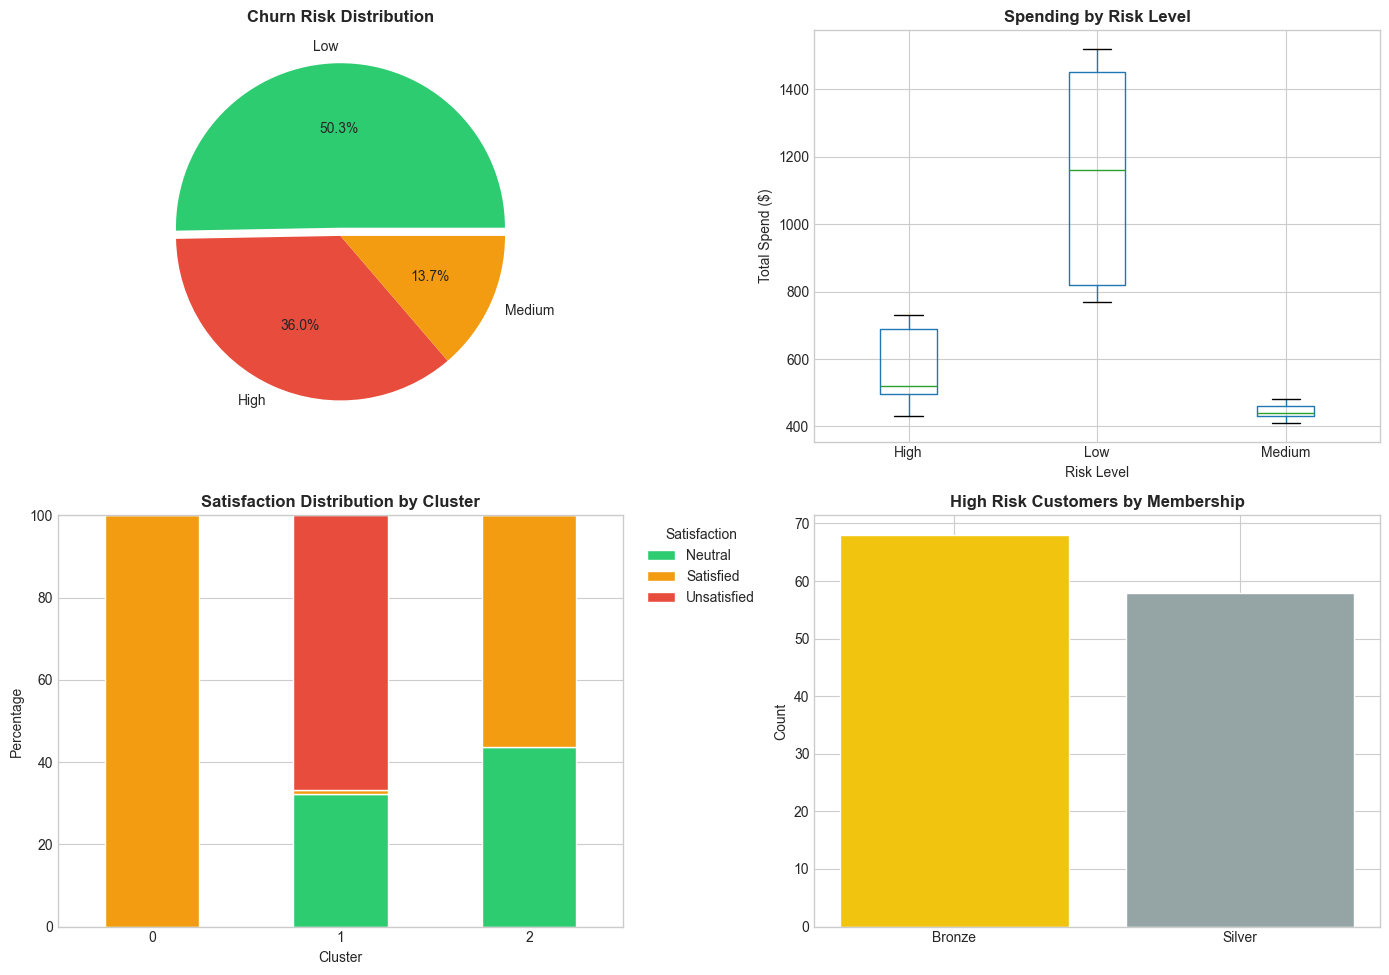

In [8]:
# Risk distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Risk Level Distribution
risk_counts = df['Risk_Level'].value_counts()
colors = {'Low': '#2ecc71', 'Medium': '#f39c12', 'High': '#e74c3c'}
axes[0, 0].pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%',
               colors=[colors[x] for x in risk_counts.index], explode=[0.05, 0, 0])
axes[0, 0].set_title('Churn Risk Distribution', fontweight='bold', fontsize=12)

# 2. Spend by Risk Level
df.boxplot(column='Total Spend', by='Risk_Level', ax=axes[0, 1])
axes[0, 1].set_title('Spending by Risk Level', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Risk Level')
axes[0, 1].set_ylabel('Total Spend ($)')
plt.suptitle('')

# 3. Satisfaction by Cluster
cluster_sat = pd.crosstab(df['Cluster'], df['Satisfaction Level'], normalize='index') * 100
cluster_sat.plot(kind='bar', stacked=True, ax=axes[1, 0],
                 color=['#2ecc71', '#f39c12', '#e74c3c'], edgecolor='white')
axes[1, 0].set_title('Satisfaction Distribution by Cluster', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(title='Satisfaction', bbox_to_anchor=(1.02, 1))
axes[1, 0].tick_params(axis='x', rotation=0)

# 4. High Risk Customers by Membership
high_risk = df[df['Risk_Level'] == 'High']
membership_risk = high_risk['Membership Type'].value_counts()
axes[1, 1].bar(membership_risk.index, membership_risk.values,
               color=['#f1c40f', '#95a5a6', '#cd7f32'], edgecolor='white')
axes[1, 1].set_title('High Risk Customers by Membership', fontweight='bold', fontsize=12)
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('../outputs/figures/19_risk_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 6. Executive Summary Generation

In [9]:
# Load model performance for summary
from models import evaluate_model
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Prepare test data for performance metrics
feature_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 
                'Days Since Last Purchase', 'Customer_Value_Score', 'Churn_Risk_Score',
                'Membership_Value', 'Spend_Per_Item']

X = df[feature_cols].copy()
y = df['Satisfaction Level'].copy()

le = LabelEncoder()
y_encoded = le.fit_transform(y)

clf_scaler = StandardScaler()
X_scaled = clf_scaler.fit_transform(X)

model_performance = evaluate_model(classifier_model, X_scaled, y_encoded)

# Generate executive summary
summary = generate_executive_summary(df, profiles, model_performance)
print(summary)


═══════════════════════════════════════════════════════════════════
                    EXECUTIVE SUMMARY
            AI-Driven Customer Behavior Analysis
═══════════════════════════════════════════════════════════════════

📊 DATASET OVERVIEW
───────────────────
• Total Customers Analyzed: 350
• Total Revenue: $295,883.60
• Average Spend per Customer: $845.38

📈 SATISFACTION DISTRIBUTION
───────────────────────────
• 😊 Satisfied: 36.3%
• 😞 Unsatisfied: 33.1%
• 😐 Neutral: 30.6%

🎯 CUSTOMER SEGMENTS IDENTIFIED
───────────────────────────────
• Cluster 0: VIP Champions (59 customers)
  Characteristics: High Spender, Highly Active, Very Satisfied
• Cluster 1: Budget Conscious (174 customers)
  Characteristics: Low Spender, Moderately Active, Needs Attention
• Cluster 2: Regular Customers (117 customers)
  Characteristics: Medium Spender, Highly Active, Satisfied

🤖 MODEL PERFORMANCE
────────────────────
• Accuracy: 100.0%
• Precision: 100.0%
• Recall: 100.0%
• F1-Score: 100.0%

══════════

/Users/mac/Documents/PROJECT/ai-customer-behavior-project/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


---
## 7. Actionable Insights Report

In [10]:
print("\n" + "═" * 70)
print("📊 ACTIONABLE INSIGHTS REPORT")
print("═" * 70)

# Calculate key metrics
total_customers = len(df)
high_risk_count = len(df[df['Risk_Level'] == 'High'])
high_value_count = len(df[df['Customer_Value_Score'] > 0.7])
unsatisfied_count = len(df[df['Satisfaction Level'] == 'Unsatisfied'])
inactive_count = len(df[df['Days Since Last Purchase'] > 40])

print(f"\n🔹 CRITICAL METRICS:")
print(f"   • Total Customers: {total_customers}")
print(f"   • High Risk Customers: {high_risk_count} ({high_risk_count/total_customers*100:.1f}%)")
print(f"   • High Value Customers: {high_value_count} ({high_value_count/total_customers*100:.1f}%)")
print(f"   • Unsatisfied Customers: {unsatisfied_count} ({unsatisfied_count/total_customers*100:.1f}%)")
print(f"   • Inactive Customers (>40 days): {inactive_count} ({inactive_count/total_customers*100:.1f}%)")

print(f"\n🎯 PRIORITY ACTION ITEMS:")
print("\n   1. 🚨 IMMEDIATE (This Week):")
print(f"      → Re-engage {high_risk_count} high-risk customers with win-back campaign")
print(f"      → Launch satisfaction survey for {unsatisfied_count} unsatisfied customers")

print("\n   2. ⚡ SHORT-TERM (This Month):")
silver_upgrade = len(df[(df['Membership Type'] == 'Silver') & (df['Total Spend'] > 800)])
print(f"      → Upgrade {silver_upgrade} eligible Silver members to Gold tier")
print(f"      → Reactivate {inactive_count} inactive customers with personalized offers")

print("\n   3. 📈 ONGOING (Continuous):")
print(f"      → Leverage {high_value_count} high-value customers for referral program")
print("      → Monitor satisfaction trends and adjust strategies")
print("      → Implement personalized recommendation engine")

print(f"\n💰 ESTIMATED IMPACT:")
avg_spend = df['Total Spend'].mean()
potential_recovery = high_risk_count * avg_spend * 0.3  # 30% recovery rate
print(f"   • Potential Revenue Recovery: ${potential_recovery:,.2f}")
print(f"   • Churn Prevention: Up to {high_risk_count} customers")
print(f"   • Upgrade Revenue: {silver_upgrade} potential Gold members")


══════════════════════════════════════════════════════════════════════
📊 ACTIONABLE INSIGHTS REPORT
══════════════════════════════════════════════════════════════════════

🔹 CRITICAL METRICS:
   • Total Customers: 350
   • High Risk Customers: 126 (36.0%)
   • High Value Customers: 82 (23.4%)
   • Unsatisfied Customers: 116 (33.1%)
   • Inactive Customers (>40 days): 55 (15.7%)

🎯 PRIORITY ACTION ITEMS:

   1. 🚨 IMMEDIATE (This Week):
      → Re-engage 126 high-risk customers with win-back campaign
      → Launch satisfaction survey for 116 unsatisfied customers

   2. ⚡ SHORT-TERM (This Month):
      → Upgrade 41 eligible Silver members to Gold tier
      → Reactivate 55 inactive customers with personalized offers

   3. 📈 ONGOING (Continuous):
      → Leverage 82 high-value customers for referral program
      → Monitor satisfaction trends and adjust strategies
      → Implement personalized recommendation engine

💰 ESTIMATED IMPACT:
   • Potential Revenue Recovery: $31,955.43
   • 

---
## 8. Save Final Outputs

In [11]:
# Save final customer data with all insights
df.to_csv('../data/processed/customer_final_insights.csv', index=False)

# Create segment summary DataFrame
segment_df = pd.DataFrame(strategies)
segment_df.to_csv('../data/processed/segment_strategies.csv', index=False)

print("\n✅ Final outputs saved:")
print("   • data/processed/customer_final_insights.csv")
print("   • data/processed/segment_strategies.csv")


✅ Final outputs saved:
   • data/processed/customer_final_insights.csv
   • data/processed/segment_strategies.csv


In [12]:
print("\n" + "═" * 70)
print("🎉 AI DECISION LAYER COMPLETE!")
print("═" * 70)

print("\n✅ PROJECT DELIVERABLES:")
print("\n   📊 DATA ARTIFACTS:")
print("      • customer_cleaned.csv - Clean dataset")
print("      • customer_features.csv - Engineered features")
print("      • customer_final_insights.csv - Complete customer profiles")
print("      • segment_strategies.csv - Segment-wise strategies")

print("\n   🤖 ML MODELS:")
print("      • kmeans_model.pkl - Customer segmentation")
print("      • best_classifier.pkl - Satisfaction prediction")
print("      • random_forest_model.pkl - Feature importance analysis")

print("\n   📈 VISUALIZATIONS:")
print("      • 19 figures in outputs/figures/")

print("\n   🧠 AI CAPABILITIES:")
print("      • Customer segmentation with personas")
print("      • Satisfaction prediction")
print("      • Automated recommendation generation")
print("      • Executive summary generation")
print("      • Risk assessment and prioritization")

print("\n" + "═" * 70)
print("🚀 SYSTEM READY FOR PRODUCTION USE!")
print("═" * 70)


══════════════════════════════════════════════════════════════════════
🎉 AI DECISION LAYER COMPLETE!
══════════════════════════════════════════════════════════════════════

✅ PROJECT DELIVERABLES:

   📊 DATA ARTIFACTS:
      • customer_cleaned.csv - Clean dataset
      • customer_features.csv - Engineered features
      • customer_final_insights.csv - Complete customer profiles
      • segment_strategies.csv - Segment-wise strategies

   🤖 ML MODELS:
      • kmeans_model.pkl - Customer segmentation
      • best_classifier.pkl - Satisfaction prediction
      • random_forest_model.pkl - Feature importance analysis

   📈 VISUALIZATIONS:
      • 19 figures in outputs/figures/

   🧠 AI CAPABILITIES:
      • Customer segmentation with personas
      • Satisfaction prediction
      • Automated recommendation generation
      • Executive summary generation
      • Risk assessment and prioritization

══════════════════════════════════════════════════════════════════════
🚀 SYSTEM READY FOR PROD